In [8]:
import numpy as np
import xarray as xr


import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [14]:
td = xr.open_dataarray('Documents/PhD/drafts/cms/issue_01.nc')

In [15]:
td

<xarray.DataArray 'temp' (lat: 96, lon: 192)>
[18432 values with dtype=float64]
Coordinates:
  * lat                      (lat) float64 -88.57 -86.72 -84.86 ... 86.72 88.57
  * lon                      (lon) float64 0.0 1.875 3.75 ... 354.4 356.2 358.1
    model                    object ...
    window                   int64 ...
    ensemble                 object ...
    forecast_reference_time  object ...
    variable                 object ...

In [18]:
vm = 1.8; step=.2
levels_anom = np.arange(-vm, vm+step, step)
levels_anom

array([-1.8000000e+00, -1.6000000e+00, -1.4000000e+00, -1.2000000e+00,
       -1.0000000e+00, -8.0000000e-01, -6.0000000e-01, -4.0000000e-01,
       -2.0000000e-01, -4.4408921e-16,  2.0000000e-01,  4.0000000e-01,
        6.0000000e-01,  8.0000000e-01,  1.0000000e+00,  1.2000000e+00,
        1.4000000e+00,  1.6000000e+00,  1.8000000e+00])

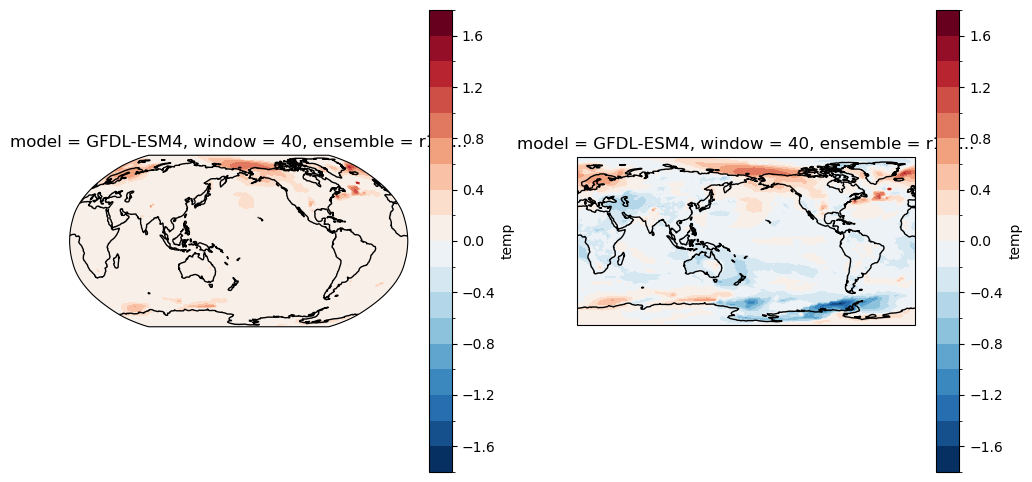

In [19]:
fig = plt.figure(figsize=(12, 6))
central_longitude = np.mean(td.lon.values)
ax1 = fig.add_subplot(121, projection=ccrs.Robinson(central_longitude=central_longitude))
ax2 = fig.add_subplot(122, projection=ccrs.PlateCarree(central_longitude=central_longitude))

td.plot.contourf(ax=ax1, transform=ccrs.PlateCarree(), levels=levels_anom)
td.plot.contourf(ax=ax2, transform=ccrs.PlateCarree(), levels=levels_anom)

ax1.coastlines(); ax2.coastlines()